This is old code, for new features, please use the updated slearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from slearn import * # old code, now updated

### sine data 

In [2]:
ts = np.array([np.sin(0.05*i) for i in range(2000)])  # original time series
train = ts[:round(0.5*len(ts))]
test = ts[round(0.5*len(ts)):]

In [3]:
sl = slearn(method='fABBA', ws=10, step=50, classifier_name="GaussianNB")
sl.set_symbols(series=ts, tol=0.1, alpha=0.2) 
sklearn_params = {'var_smoothing':0.001} # sklearn parameters, setting any you want
abba_nb_pred = sl.predict(**sklearn_params)

Compression: Reduced series of length 2000 to 33 segments. Digitization: Reduced 33 pieces to 4 symbols.
-------- Config --------
The length of time series:  2000
The number of symbols:  33
The dimension of features is:  10
The number of symbols to be predicted:  50
The parameters of classifiers:  {'var_smoothing': 0.001}


In [4]:
sl = slearn(method='fABBA', ws=3, step=50, classifier_name="MLPClassifier")
sl.set_symbols(series=ts, tol=0.1, alpha=0.2) 
sklearn_params = {'hidden_layer_sizes':(20,80), 'learning_rate_init':0.1}
abba_nn_pred = sl.predict(**sklearn_params)

Compression: Reduced series of length 2000 to 33 segments. Digitization: Reduced 33 pieces to 4 symbols.
-------- Config --------
The length of time series:  2000
The number of symbols:  33
The dimension of features is:  3
The number of symbols to be predicted:  50
The parameters of classifiers:  {'hidden_layer_sizes': (20, 80), 'learning_rate_init': 0.1}


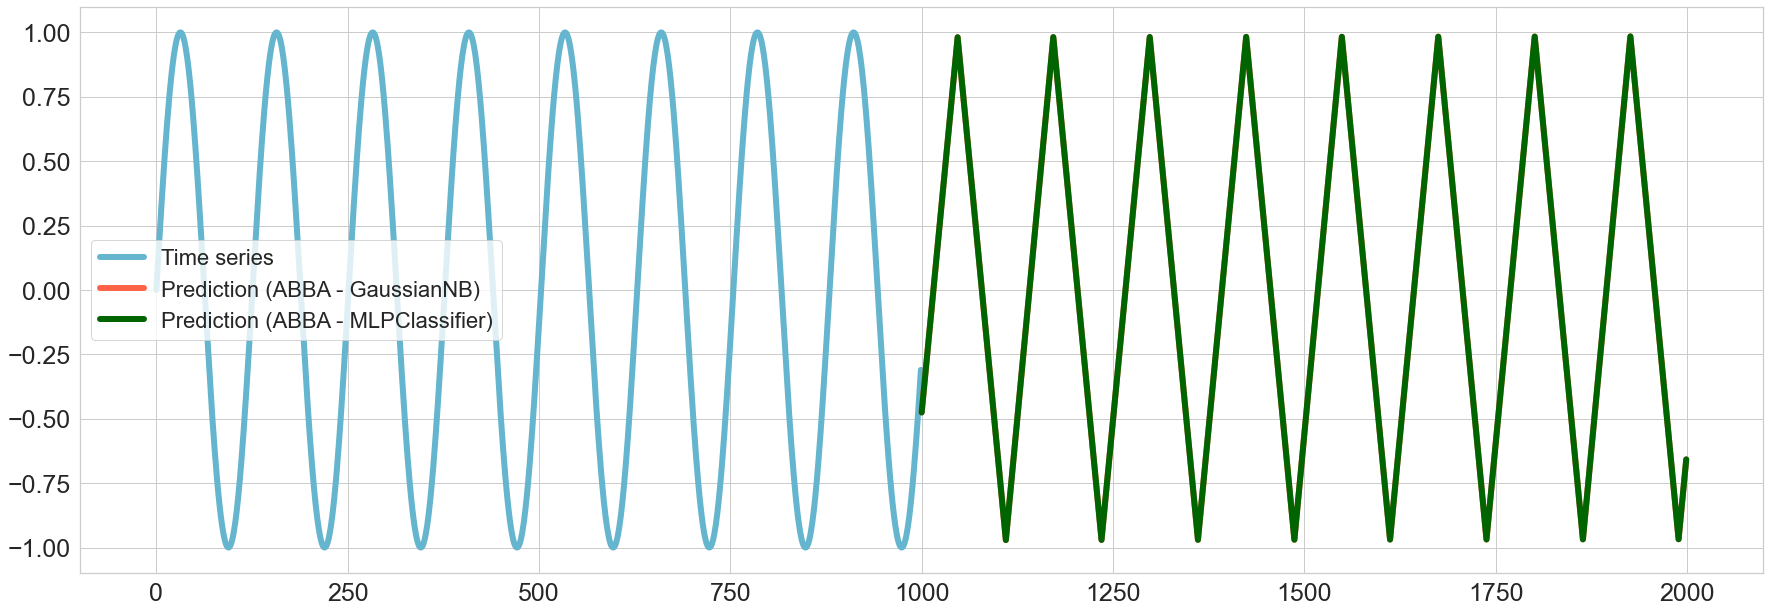

In [5]:
min_len = len(test)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 9))
sns.set(font_scale=2, style="whitegrid")
sns.lineplot(x=np.arange(0, len(train)), y=train, color='c', linewidth=6, label='Time series')
sns.lineplot(x=np.arange(len(train), len(train)+min_len), y=abba_nb_pred[:min_len], color='tomato', linewidth=6, label='Prediction (ABBA - GaussianNB)')
sns.lineplot(x=np.arange(len(train), len(train)+min_len), y=abba_nn_pred[:min_len], color='darkgreen', linewidth=6, label='Prediction (ABBA - MLPClassifier)')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=25)
plt.show()

### real world data

In [6]:
time_series = pd.read_csv("Amazon.csv")
ts = time_series.Close.values
# ts = [np.sin(0.05*i) for i in range(1000)]

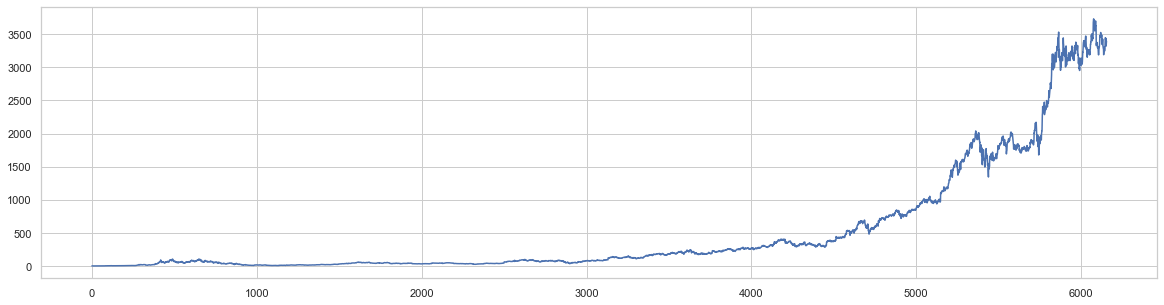

In [7]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=ts)
plt.show()

In [8]:
step = 100 # predict 30 symbolss

In [9]:
sl = slearn(method='fABBA', ws=8, step=100, classifier_name="GaussianNB")
sl.set_symbols(series=ts, tol=0.01, alpha=0.1) 
sklearn_params = {'var_smoothing':0.001} # sklearn parameters, setting any you want
abba_nb_pred = sl.predict(**sklearn_params)

Compression: Reduced series of length 6155 to 77 segments. Digitization: Reduced 77 pieces to 31 symbols.
-------- Config --------
The length of time series:  6155
The number of symbols:  77
The dimension of features is:  8
The number of symbols to be predicted:  100
The parameters of classifiers:  {'var_smoothing': 0.001}


In [10]:
sl = slearn(method='fABBA', ws=8, step=100, classifier_name="MLPClassifier")
sl.set_symbols(series=ts, tol=0.01, alpha=0.1) 
sklearn_params = {'hidden_layer_sizes':(20,10), 'learning_rate_init':0.01}
abba_nn_pred = sl.predict(**sklearn_params)

Compression: Reduced series of length 6155 to 77 segments. Digitization: Reduced 77 pieces to 31 symbols.
-------- Config --------
The length of time series:  6155
The number of symbols:  77
The dimension of features is:  8
The number of symbols to be predicted:  100
The parameters of classifiers:  {'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.01}


C:\Users\cclcq\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


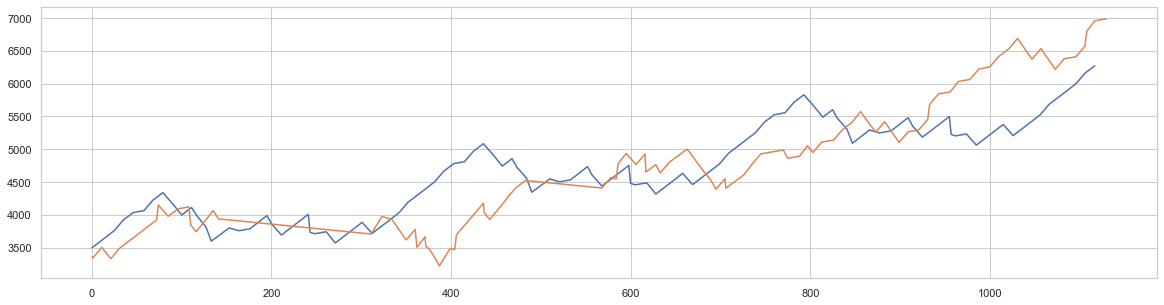

In [11]:
plt.figure(figsize=(20, 5))
sns.set_theme(style="whitegrid")
sns.lineplot(data=abba_nb_pred)
sns.lineplot(data=abba_nn_pred)
plt.show()

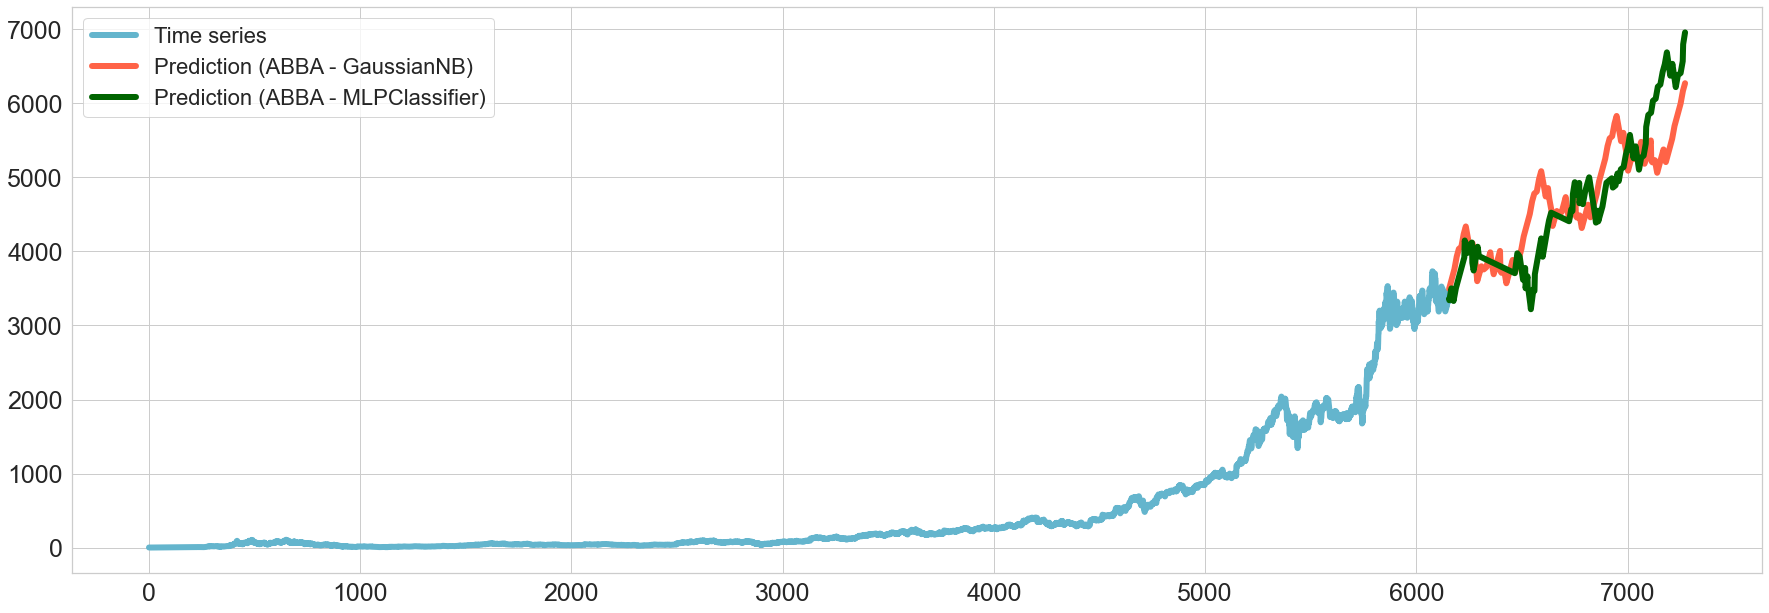

In [12]:
plt.figure(figsize=(25, 9))
min_len = np.min([len(abba_nb_pred), len(abba_nn_pred)])
sns.set(font_scale=2, style="whitegrid")
sns.lineplot(x=np.arange(0, len(ts)), y= ts, color='c', linewidth=6, label='Time series')
sns.lineplot(x=np.arange(len(ts), len(ts)+min_len), y=abba_nb_pred[:min_len], color='tomato', linewidth=6, label='Prediction (ABBA - GaussianNB)')
sns.lineplot(x=np.arange(len(ts), len(ts)+min_len), y=abba_nn_pred[:min_len], color='darkgreen', linewidth=6, label='Prediction (ABBA - MLPClassifier)')
plt.tight_layout()
plt.tick_params(axis='both', labelsize=25)
plt.savefig("demo.PNG")
plt.show()